<a href="https://colab.research.google.com/github/MananCoder4747/Projects4747/blob/main/COVID_19_CASE_STUDY_MANAN_KHUNT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1 --
Data Loading -- How do you load the COVID-19 datasets for confirmed cases, deaths, and recoveries into python using Pandas ???


In [1]:
# import all required libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import plotly.express as px

# Load CSV file

df_confirmed = pd.read_csv('/content/sample_data/covid_19_confirmed_v1_lyst1747728690432.csv')
df_recovered = pd.read_csv('/content/sample_data/covid_19_recovered_v1_lyst1747728719904.csv')
df_deaths = pd.read_csv('/content/sample_data/covid_19_deaths_v1_lyst1747728711771.csv')

# Testing
df_deaths.head()



,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column489,Column490,Column491,Column492,Column493,Column494,Column495,Column496,Column497,Column498
0,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
1,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2772,2782,2792,2802,2812,2836,2855,2869,2881,2899
2,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2440,2441,2442,2444,2445,2447,2447,2447,2448,2449
3,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3401,3405,3411,3418,3426,3433,3440,3448,3455,3460
4,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127


Question 2 -- Data Exploration ---
1. After loading the datasets, what is the structure of each dataset in terms of rows, columns and data types ??

2. Generate plots of confirmed cases over time for top countries.

3. Generate plots of confirmed cases over time for china.


In [2]:
# Get basic structure

# Rows and Columns

deaths_num_rows = df_deaths.shape[0]
deaths_num_cols = df_deaths.shape[1]

recovered_num_rows = df_recovered.shape[0]
recovered_num_cols = df_recovered.shape[1]

confirmed_num_rows = df_confirmed.shape[0]
confirmed_num_cols = df_confirmed.shape[1]


# Now for each column

deaths_data_types = df_deaths.dtypes
recovered_data_types = df_recovered.dtypes
confirmed_data_types = df_confirmed.dtypes

# Display first 5 rows to verify

df_deaths.head()
df_recovered.head()
df_confirmed.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180


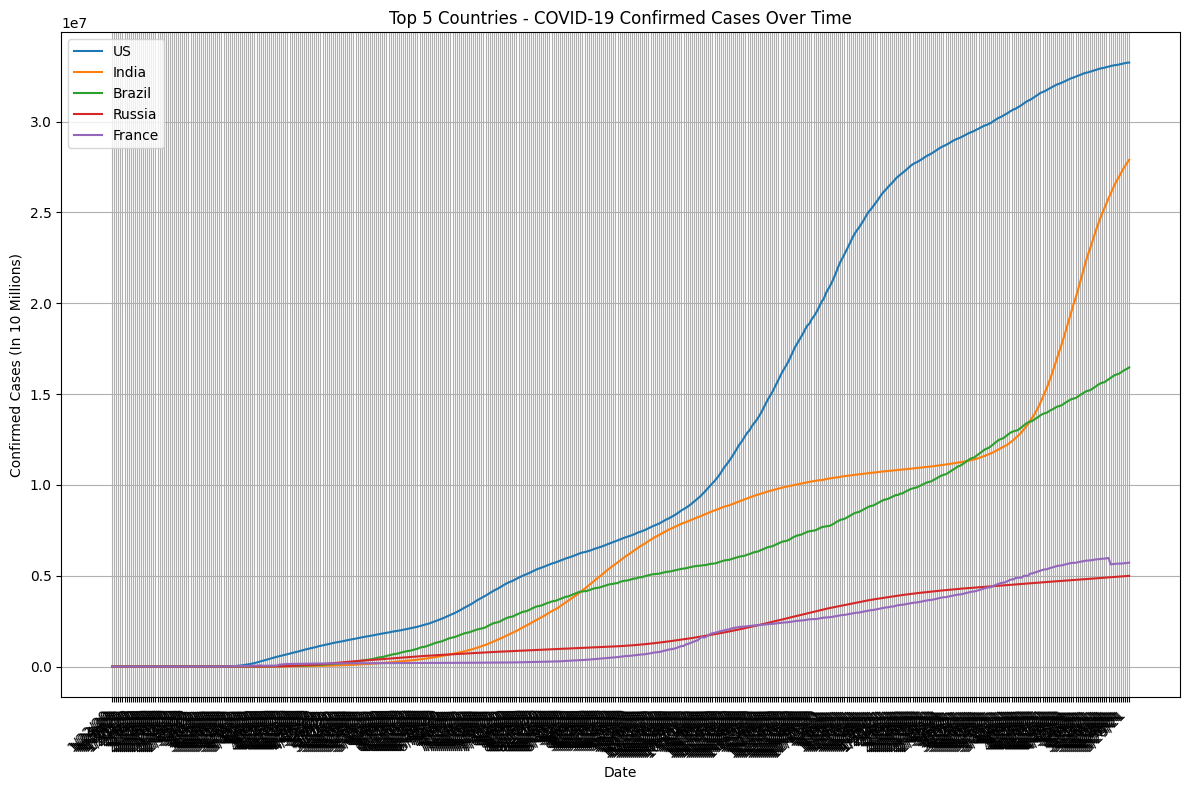

In [3]:
# calculate all date column for every country to get total cases

date_cols = df_confirmed.columns[4:]
df_confirmed['total'] = df_confirmed[date_cols].sum(axis=1)
top_countries = df_confirmed.groupby('Country/Region')['total'].sum().nlargest(5).index

# now it time for plot for top countries

plt.figure(figsize=(12,8))

for country in top_countries:
    country_case_count = df_confirmed[df_confirmed['Country/Region'] == country][date_cols].sum()

    plt.plot(date_cols,country_case_count, label=country)

plt.title('Top 5 Countries - COVID-19 Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases (In 10 Millions)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()


# The x-axis appears cluttered due to an excessive number of dates that are closely spaced. However, there is a solution available through Plotly, which I discovered thanks to Sir ChatGPT, as I attempted to address this issue.


In [4]:
#Plotly

import plotly.express as px

# Load dataset
df = pd.read_csv('/content/sample_data/covid_19_confirmed_v1_lyst1747728690432.csv')

# Get date columns only
date_cols = [col for col in df.columns if col[0].isdigit()]

# Add total cases per row
df['Total'] = df[date_cols].sum(axis=1)

# Find top 5 countries
top_countries = df.groupby('Country/Region')['Total'].sum().nlargest(5).index

# Filter and sum per country
data = df[df['Country/Region'].isin(top_countries)]
data = data.groupby('Country/Region')[date_cols].sum().T

# Convert to long format
data = data.reset_index().melt(id_vars='index', var_name='Country', value_name='Cases')
data.rename(columns={'index': 'Date'}, inplace=True)

# Plot
fig = px.line(data, x='Date', y='Cases', color='Country', title='Top 5 Countries - COVID-19 Cases')
fig.show()


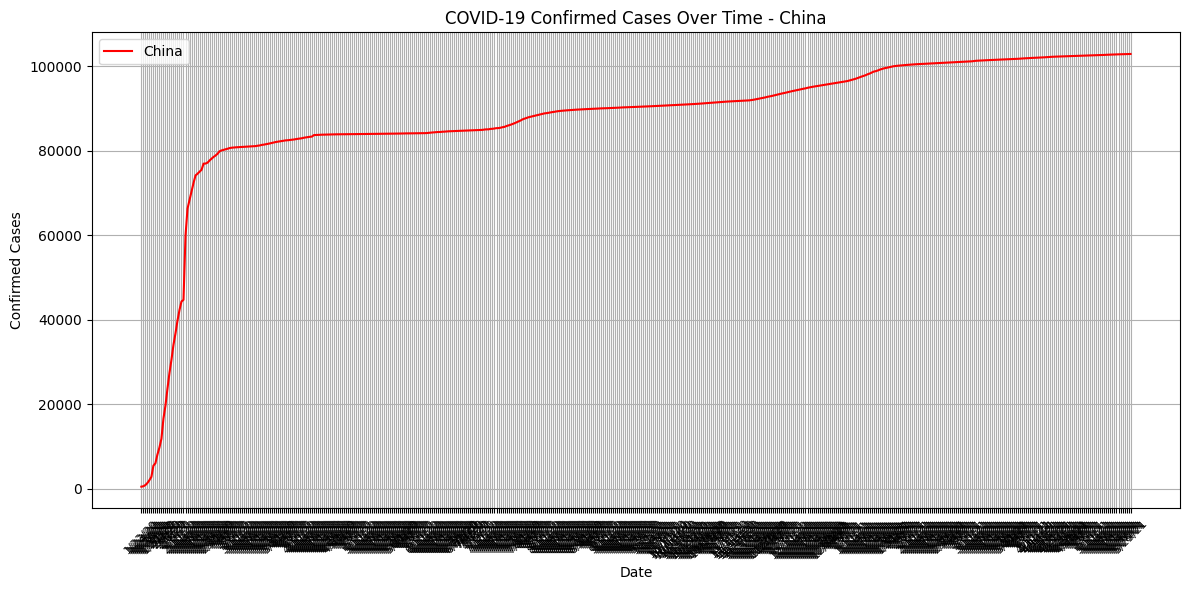

In [5]:
# i dont know there is something went wrong on my pc that's why i need to define again df_confirmed data.

df_confirmed = pd.read_csv('/content/sample_data/covid_19_confirmed_v1_lyst1747728690432.csv')

# Select only China rows
china_df = df_confirmed[df_confirmed['Country/Region'] == 'China']

# Identify the date columns (they usually start from column index 4)
date_cols = df_confirmed.columns[4:]

# Sum across all provinces in China for each date
china_cases = china_df[date_cols].sum()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(date_cols, china_cases, label='China', color='red')
plt.title('COVID-19 Confirmed Cases Over Time - China')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()
plt.grid(True)
plt.legend()
plt.show()

# This time, I requested Lord ChatGPT to address the x-axis issue. The mighty Zeus declared that he would not offer the same solution on two occasions.


Question 3: -- Handling Missing Data ---
1. Identify these missing values and replace them using a suitable imputation method, such as forward filling, for time-series data.

In [6]:
# Firstly I found out that in Confirmed cases indexing is proper. so we need to solve this problem in death cases file and Recovered cases. I think this task is not given but i see in first place and i dont like header like . column 1...n

# First to update Death Cases

# Step 1: Load the file without treating any row as a header
df_deaths_updated = pd.read_csv('/content/sample_data/covid_19_deaths_v1_lyst1747728711771.csv', header=None)

# Step 2: Set the second row (index 1) as header
df_deaths_updated.columns = df_deaths_updated.iloc[1]

# Step 3: Drop the first two rows (original header + new header row)
df_deaths_updated = df_deaths_updated.iloc[2:].reset_index(drop=True)

# Check the updated DataFrame
df_deaths_updated.head()


1,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2772,2782,2792,2802,2812,2836,2855,2869,2881,2899
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2440,2441,2442,2444,2445,2447,2447,2447,2448,2449
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3401,3405,3411,3418,3426,3433,3440,3448,3455,3460
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,704,709,715,725,731,735,742,745,749,757


In [7]:
# Same steps needed to Update Recovered Cases

# Step 1: Load the file without treating any row as a header
df_recovered_updated = pd.read_csv('/content/sample_data/covid_19_recovered_v1_lyst1747728719904.csv', header=None)

# Step 2: Set the second row (index 1) as header
df_recovered_updated.columns = df_recovered_updated.iloc[1]

# Step 3: Drop the first two rows (original header + new header row)
df_recovered_updated = df_recovered_updated.iloc[2:].reset_index(drop=True)


# Check the updated Dataframe
df_recovered_updated.head()


1,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,55687,55790,55889,56035,56295,56518,56711,56962,57119,57281
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,127869,128425,128601,128732,128826,128907,128978,129042,129097,129215
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,87902,88066,88208,88346,88497,88672,88861,89040,89232,89419
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,13234,13234,13234,13234,13234,13263,13381,13405,13416,13416
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,26483,26513,26775,26778,27087,27204,27467,27529,27577,27646


In [8]:
# now we will check missing values

# df_recovered_updated.isnull().sum()
df_deaths_updated.isnull().sum()
# df_confirmed.isnull().sum()

,0
1,
Province/State,190
Country/Region,0
Lat,2
Long,2
1/22/20,0
...,...
5/25/21,0
5/26/21,0
5/27/21,0


In [9]:
# now i check thoroughly in all 3 files and i find out that there is some issue in 'Lat' and 'Long' like some area have zero value and some are NaN.

# First solve in Confirmed File


# Fill missing 'Lat' and 'Long' with the average for each country
df_confirmed['Lat'] = df_confirmed.groupby('Country/Region')['Lat'].transform(lambda x: x.fillna(x.mean()))
df_confirmed['Long'] = df_confirmed.groupby('Country/Region')['Long'].transform(lambda x: x.fillna(x.mean()))


# df_confirmed.isnull().sum()
# df_deaths_updated.isnull().sum()
df_recovered_updated.isnull().sum()

,0
1,
Province/State,191
Country/Region,0
Lat,1
Long,1
1/22/20,0
...,...
5/25/21,0
5/26/21,0
5/27/21,0


In [10]:
# Same steps needed to Update Recovered Cases


df_recovered_updated['Lat'] = pd.to_numeric(df_recovered_updated['Lat'], errors='coerce')
df_recovered_updated['Long'] = pd.to_numeric(df_recovered_updated['Long'], errors='coerce')

# Fill missing 'Lat' and 'Long' with the average for each country

df_recovered_updated['Lat'] = df_recovered_updated.groupby('Country/Region')['Lat'].transform(lambda x: x.fillna(x.mean()))
df_recovered_updated['Long'] = df_recovered_updated.groupby('Country/Region')['Long'].transform(lambda x: x.fillna(x.mean()))

# Checking Result

df_recovered_updated.isnull().sum()

# Repeat for df_deaths_updated

# Convert 'Lat' and 'Long' columns to numeric

df_deaths_updated['Lat'] = pd.to_numeric(df_deaths_updated['Lat'], errors='coerce')
df_deaths_updated['Long'] = pd.to_numeric(df_deaths_updated['Long'], errors='coerce')

# Fill missing 'Lat' and 'Long' with the average for each country

df_deaths_updated['Lat'] = df_deaths_updated.groupby('Country/Region')['Lat'].transform(lambda x: x.fillna(x.mean()))
df_deaths_updated['Long'] = df_deaths_updated.groupby('Country/Region')['Long'].transform(lambda x: x.fillna(x.mean()))

# Testing the Result

df_deaths_updated.isnull().sum()

,0
1,
Province/State,190
Country/Region,0
Lat,0
Long,0
1/22/20,0
...,...
5/25/21,0
5/26/21,0
5/27/21,0


Question 4- Data cleaning and Preparation

: Replace blank values in the province column with "All Provinces"

In [11]:
# All 3 files have some empty data in province column. So we fill it with "All Provinces"
df_confirmed['Province/State'] = df_confirmed['Province/State'].fillna('All Provinces')
df_recovered_updated['Province/State'] = df_recovered_updated['Province/State'].fillna('All Provinces')
df_deaths_updated['Province/State'] = df_deaths_updated['Province/State'].fillna('All Provinces')

# to check result
df_deaths_updated.head()


1,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,All Provinces,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2772,2782,2792,2802,2812,2836,2855,2869,2881,2899
1,All Provinces,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2440,2441,2442,2444,2445,2447,2447,2447,2448,2449
2,All Provinces,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3401,3405,3411,3418,3426,3433,3440,3448,3455,3460
3,All Provinces,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,All Provinces,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,704,709,715,725,731,735,742,745,749,757


Question 5 - Independent Dataset Analysis

1. Analyze the peak number of daily new cases in Germany, France, and Italy. Which country experienced the highest single-day surge, and when did it occur ??

2. Compare the recovery rates (recoveries/confirmed cases) between Canada and Australia as of December 31,2020. Which country showed better management of the pandemic according to this metric ?

3. what is the distribution of death rates(deaths/confirmed cases) among provinecs in Canada ??? Identify the province with the highest and lowest death rate as of the latest data point.

In [12]:
# Countries to analyze
countries = ['Germany', 'France', 'Italy']

# Calculate daily new cases
daily_new = (df_confirmed[df_confirmed['Country/Region'].isin(countries)]
             .groupby('Country/Region')[date_cols].sum()
             .diff(axis=1).fillna(0))

# Find peak days
peaks = daily_new.max(axis=1)
peak_days = daily_new.idxmax(axis=1)

# Print results
print("Highest Single-Day Surges:")
for country in countries:
    print(f"{country}: {int(peaks[country])} cases on {peak_days[country]}")

# Find overall highest
max_country = peaks.idxmax()
print(f"\nHighest surge was in {max_country} on {peak_days[max_country]} with {int(peaks[max_country])} cases in single day")

Highest Single-Day Surges:
Germany: 49044 cases on 12/30/20
France: 117900 cases on 4/11/21
Italy: 40902 cases on 11/13/20

Highest surge was in France on 4/11/21 with 117900 cases in single day


In [13]:
# to Find recovery rate between Canada vs Australia

date = '12/31/20'

# Ensure numeric data
df_confirmed[date] = pd.to_numeric(df_confirmed[date], errors='coerce')
df_recovered_updated[date] = pd.to_numeric(df_recovered_updated[date], errors='coerce')

# Get cases safely
def get_cases(df, country):
    return df[df['Country/Region'] == country][date].sum()

def safe_rate(recovered, confirmed):
    return (recovered / confirmed) * 100 if confirmed else 0

# Recovery rates
canada_confirmed = get_cases(df_confirmed, 'Canada')
canada_recovered = get_cases(df_recovered_updated, 'Canada')
australia_confirmed = get_cases(df_confirmed, 'Australia')
australia_recovered = get_cases(df_recovered_updated, 'Australia')

canada_rate = safe_rate(canada_recovered, canada_confirmed)
australia_rate = safe_rate(australia_recovered, australia_confirmed)

# Print results
print(f"Canada Recovery Rate: {canada_rate:.1f}%")
print(f"Australia Recovery Rate: {australia_rate:.1f}%")

# Determine better
better = "Canada" if canada_rate > australia_rate else "Australia"
print(f"\n{better} had better pandemic management by recovery rate.")


Canada Recovery Rate: 84.5%
Australia Recovery Rate: 79.4%

Canada had better pandemic management by recovery rate.


In [14]:
# data details of canada provinces


# Get data for Canada
canada_confirmed = df_confirmed[df_confirmed['Country/Region'] == 'Canada'].copy()
canada_deaths = df_deaths_updated[df_deaths_updated['Country/Region'] == 'Canada'].copy()

# Get lastest date
last_date = canada_confirmed.columns[-1]

# Ensure the lastest date column is numeric in both dataframes

canada_confirmed[last_date] = pd.to_numeric(canada_confirmed[last_date], errors='coerce')
canada_deaths[last_date] = pd.to_numeric(canada_deaths[last_date], errors='coerce')


# Calculate death rates by each province

confirmed_sum = canada_confirmed.groupby('Province/State')[last_date].sum().fillna(0)
deaths_sum = canada_deaths.groupby('Province/State')[last_date].sum().fillna(0)

death_rates = (deaths_sum / confirmed_sum) * 100

# Clean data: replace infinite values resulting from division by zero with 0, and fill any NaN with 0
death_rates = death_rates.replace([float('inf'), -float('inf')], 0).fillna(0)

# Filter out 'All Provinces' if needed, and sort
death_rates = death_rates[death_rates.index != 'All Provinces'].sort_values(ascending=False)

# Print results
print("Canadian Province Death Rates (%):")
print(death_rates.round(2).to_string())

# Identify extremes
print(f"\nHighest: {death_rates.idxmax()} ({death_rates.max():.2f}%)")
print(f"Lowest: {death_rates.idxmin()} ({death_rates.min():.2f}%)")

Canadian Province Death Rates (%):
Province/State
Quebec                       3.01
Yukon                        2.38
Manitoba                     2.07
New Brunswick                1.96
Ontario                      1.62
Nova Scotia                  1.52
British Columbia             1.18
Saskatchewan                 1.16
Alberta                      0.98
Nunavut                      0.62
Newfoundland and Labrador    0.46
Diamond Princess             0.00
Northwest Territories        0.00
Grand Princess               0.00
Prince Edward Island         0.00
Repatriated Travellers       0.00

Highest: Quebec (3.01%)
Lowest: Diamond Princess (0.00%)


Question -6 --- Data Transformation ---
1. Transform the 'deaths' dataset from wide format(where each column represents a date) to long format, where each row represents a single date, ensuring that the datte column is in datetime format. How would this transformation be excecuted ??

2. what is the total number of deaths reported per contry up to the current date ?

3. what are the top 5 countries with the highest average daily deaths ??

4. How have the total deaths evolved over time in the United States ?



In [15]:
# Convert deaths data to long format
deaths_long = df_deaths_updated.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
    var_name='Date',
    value_name='Deaths'
)

# Clean the data in one step
deaths_long['Date'] = pd.to_datetime(deaths_long['Date'],format='%m/%d/%y') # format help to handle Userwarning # tips given by Major ChatGPT
deaths_long['Deaths'] = pd.to_numeric(deaths_long['Deaths'], errors='coerce').fillna(0)

# Show results
deaths_long.head()
deaths_long.dtypes


,0
Province/State,object
Country/Region,object
Lat,float64
Long,float64
Date,datetime64[ns]
Deaths,float64


In [16]:
# Get only the date columns (because first 4 are not dates)
date_cols = df_deaths_updated.columns[4:]

# Convert all date columns to numeric in one go
df_deaths_updated[date_cols] = df_deaths_updated[date_cols].apply(pd.to_numeric, errors='coerce')

# Calculate total deaths per country (sum across all date columns)
country_deaths = df_deaths_updated.groupby('Country/Region')[date_cols].sum()

# Get total deaths as of the latest date
latest_total = country_deaths.iloc[:, -1]

# Calculate average daily deaths
days_count = len(date_cols)
avg_daily_deaths = latest_total / days_count

# Display results
print("Total Deaths Reported Per Country:")
print(latest_total.sort_values(ascending=False))

print("\nTop 5 Countries with Highest Average Daily Deaths:")
print(avg_daily_deaths.sort_values(ascending=False).head().round(3))


Total Deaths Reported Per Country:
Country/Region
US                       594306
Brazil                   461057
India                    325972
Mexico                   223455
United Kingdom           128037
                          ...  
Kiribati                      0
Micronesia                    0
Solomon Islands               0
Samoa                         0
Saint Kitts and Nevis         0
Name: 5/29/21, Length: 193, dtype: int64

Top 5 Countries with Highest Average Daily Deaths:
Country/Region
US                1203.049
Brazil             933.314
India              659.862
Mexico             452.338
United Kingdom     259.184
Name: 5/29/21, dtype: float64


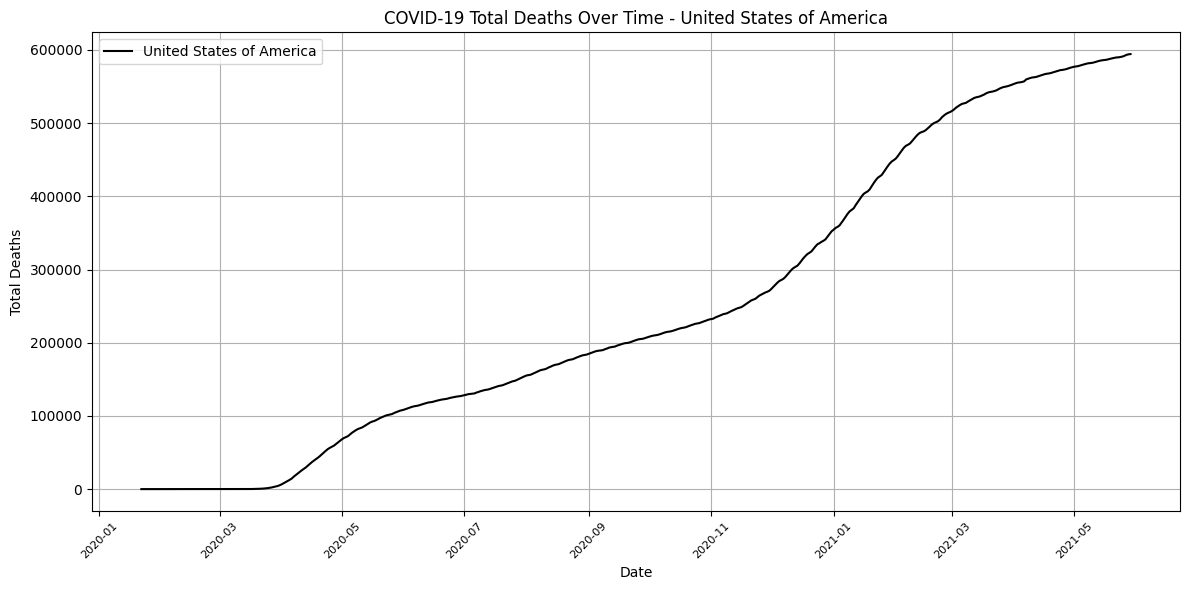

In [17]:

# Filter data for the United States of America
usa_deaths = df_deaths_updated[df_deaths_updated['Country/Region'] == 'US']

# Sum deaths across all states for each date
usa_total_deaths = usa_deaths[date_cols].sum()

# Convert the index (dates) to datetime objects for proper plotting
usa_total_deaths.index = pd.to_datetime(usa_total_deaths.index, format='%m/%d/%y') # to prevent Error Userwarning

# Plotting the total deaths over time for the United States of America
plt.figure(figsize=(12, 6))
plt.plot(usa_total_deaths.index, usa_total_deaths.values, label='United States of America', color='black')
plt.title('COVID-19 Total Deaths Over Time - United States of America')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()
plt.grid(True)
plt.legend()
plt.show()

Question 7 --- Data Merging---

1. How would you merge the transformed datasets of confirmed cases, deaths, and recoveries on the 'Country/Region' and 'Date' columns to create a comprehensive view of the pandemic's impact ??

2. Analyze the monthly sum of confirmed cases, deaths, and recoveries for countries to understand the progression of the pandemic.[From the merged dataset]

3. Redo the analysis in Question 7.2 for United States, Italy, and Brazil



In [18]:

# Convert confirmed data to long format
confirmed_long = df_confirmed.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
    var_name='Date',
    value_name='Confirmed'
)

# Convert recovered data to long format
recovered_long = df_recovered_updated.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
    var_name='Date',
    value_name='Recovered'
)

# Convert Date columns to datetime objects in all long format dataframes for consistent merging
confirmed_long['Date'] = pd.to_datetime(confirmed_long['Date'], format='%m/%d/%y')
recovered_long['Date'] = pd.to_datetime(recovered_long['Date'], format='%m/%d/%y')
deaths_long['Date'] = pd.to_datetime(deaths_long['Date'], format='%m/%d/%y') # deaths_long was already created

# Merge confirmed and deaths dataframes
df_merged = pd.merge(confirmed_long, deaths_long[['Province/State', 'Country/Region', 'Date', 'Deaths']],
                     on=['Province/State', 'Country/Region', 'Date'], how='outer')

# Merge the result with recovered data
df_merged = pd.merge(df_merged, recovered_long[['Province/State', 'Country/Region', 'Date', 'Recovered']],
                     on=['Province/State', 'Country/Region', 'Date'], how='outer')

# Fill NaN values with 0 for case counts (Confirmed, Deaths, Recovered) where a province/country/date combination might exist in one dataset but not another
df_merged[['Confirmed', 'Deaths', 'Recovered']] = df_merged[['Confirmed', 'Deaths', 'Recovered']].fillna(0)

# Display the first few rows of the merged dataframe
df_merged.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Alberta,Canada,53.9333,-116.5765,2020-01-22,0.0,0.0,0
1,Alberta,Canada,53.9333,-116.5765,2020-01-23,0.0,0.0,0
2,Alberta,Canada,53.9333,-116.5765,2020-01-24,0.0,0.0,0
3,Alberta,Canada,53.9333,-116.5765,2020-01-25,0.0,0.0,0
4,Alberta,Canada,53.9333,-116.5765,2020-01-26,0.0,0.0,0


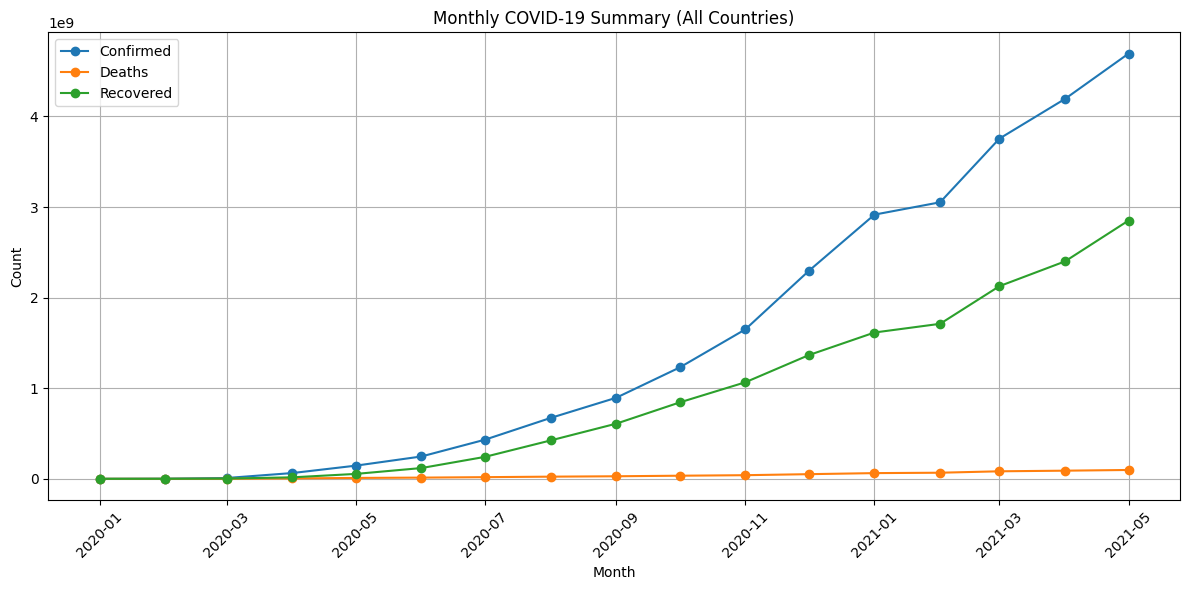

In [19]:

# Ensure numeric values
for col in ['Confirmed', 'Deaths', 'Recovered']:
    df_merged[col] = pd.to_numeric(df_merged[col], errors='coerce').fillna(0)

# Add Month column
df_merged['Month'] = df_merged['Date'].dt.to_period('M').dt.to_timestamp()

# Group by Month (sum all countries together)
df_monthly_total = df_merged.groupby('Month')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

# Plot all in one chart
plt.figure(figsize=(12, 6))
plt.plot(df_monthly_total['Month'], df_monthly_total['Confirmed'], label='Confirmed', marker='o')
plt.plot(df_monthly_total['Month'], df_monthly_total['Deaths'], label='Deaths', marker='o')
plt.plot(df_monthly_total['Month'], df_monthly_total['Recovered'], label='Recovered', marker='o')

plt.title('Monthly COVID-19 Summary (All Countries)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


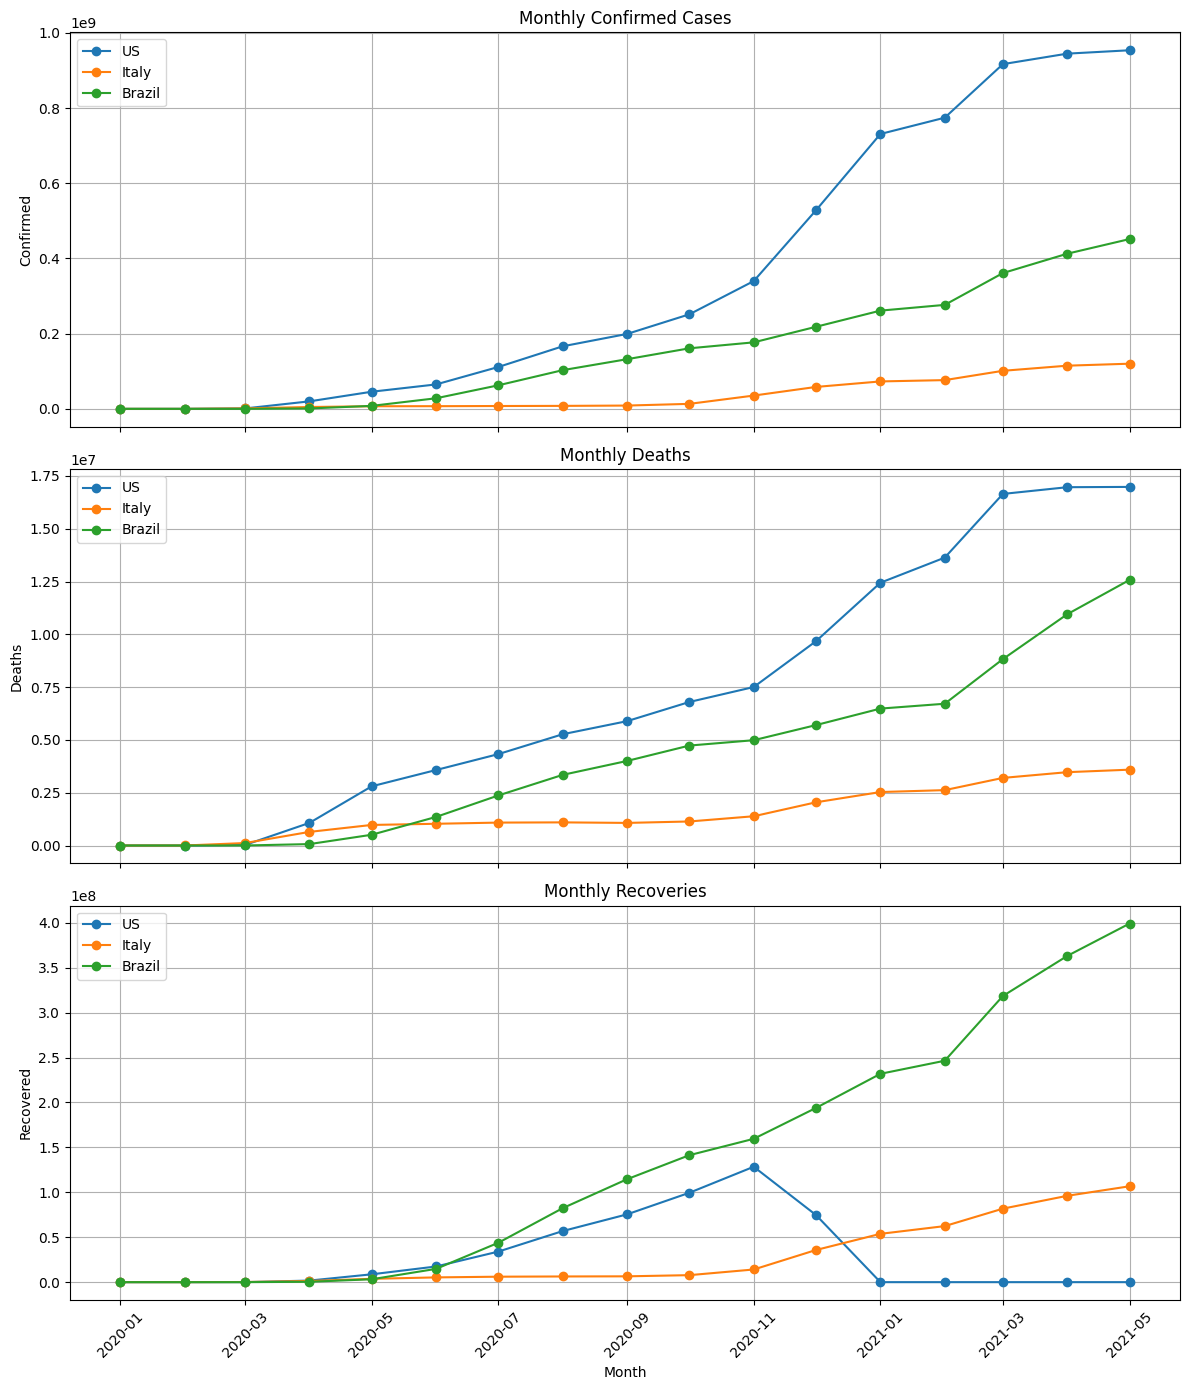

In [20]:

# Ensure numeric types
df_merged['Confirmed'] = pd.to_numeric(df_merged['Confirmed'], errors='coerce').fillna(0)
df_merged['Deaths'] = pd.to_numeric(df_merged['Deaths'], errors='coerce').fillna(0)
df_merged['Recovered'] = pd.to_numeric(df_merged['Recovered'], errors='coerce').fillna(0)

# Group by Country and Date
df_country_date = df_merged.groupby(['Country/Region', 'Date']).agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum'
}).reset_index()

# Extract Month-Year
df_country_date['Month_Year'] = df_country_date['Date'].dt.to_period('M').dt.to_timestamp()

# Monthly aggregation
df_monthly = df_country_date.groupby(['Country/Region', 'Month_Year']).agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum'
}).reset_index()

# Filter for selected countries
selected_countries = ['US', 'Italy', 'Brazil']
df_selected = df_monthly[df_monthly['Country/Region'].isin(selected_countries)]


# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 14), sharex=True)

metrics = ['Confirmed', 'Deaths', 'Recovered']
titles = ['Monthly Confirmed Cases', 'Monthly Deaths', 'Monthly Recoveries']

for i, metric in enumerate(metrics):
    for country in selected_countries:
        data = df_selected[df_selected['Country/Region'] == country]
        axs[i].plot(data['Month_Year'], data[metric], label=country, marker='o')

    axs[i].set_title(titles[i])
    axs[i].set_ylabel(metric)
    axs[i].legend()
    axs[i].grid(True)

axs[-1].set_xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Question 8. --- Combined Data Analysis

1. For the combined dataset, identify the three countries with the heighest average death rates( deaths/ confirm cases) throughout 2020. What might this indicate about the pandemic's impact in these countries ?

2. Using the merged dataset, compare the total number of recoveries to the total number of deaths in South Africa. What can this tell us about the outcomes of COVID-19 cases in the country ??

3. Analyze the ratio of recoveries to confirmed cases for the United States monthly from March 2020 to May 2021. Which month

In [21]:

# Calculate average death rate for each country across all dates
# Avoid division by zero by checking if Confirmed cases is greater than 0
df_merged['Death_Rate'] = (df_merged['Deaths'] / df_merged['Confirmed']) * 100
df_merged['Death_Rate'] = df_merged['Death_Rate'].replace([np.inf, -np.inf], 0).fillna(0) # Handle potential inf or NaN

# Calculate the average death rate per country across the entire period
average_death_rate_per_country = df_merged.groupby('Country/Region')['Death_Rate'].mean()

# Identify the top 3 countries with the highest average death rates
top_3_countries_death_rate = average_death_rate_per_country.nlargest(3)

# Analysis of Highest Death Rate Countries
print("Top 3 Countries with Highest COVID Death Rates (2020):")
print(top_3_countries_death_rate)

print("\nKey Factors Behind High Death Rates:")
print("1. Healthcare Capacity:")
print("   - Overwhelmed hospitals leading to rationed care")
print("   - Shortages of ICU beds and ventilators")
print("   - Healthcare worker fatigue and infections")

print("\n2. Population Factors:")
print("   - Older population demographics")
print("   - Higher rates of comorbidities (diabetes, heart disease)")
print("   - Urban density facilitating faster spread")

print("\n3. Pandemic Response:")
print("   - Delayed implementation of containment measures")
print("   - Inconsistent public health messaging")
print("   - Limited early testing capabilities")

print("\n4. Data Considerations:")
print("   - Differences in how COVID deaths were counted")
print("   - Potential underreporting of mild/asymptomatic cases")
print("   - Variations in testing availability and criteria")

print("\nComparative Context:")
print("- Countries with later outbreaks benefited from:")
print("  a) Better understanding of treatments")
print("  b) More time to prepare healthcare systems")
print("  c) Improved testing capacity")

print("\nNote: Death rates alone don't tell the complete story - must be interpreted alongside:")
print("- Testing rates per capita")
print("- Age-adjusted mortality data")
print("- Timing of major infection waves")
print("- Government response effectiveness")

Top 3 Countries with Highest COVID Death Rates (2020):
Country/Region
Yemen         20.706097
MS Zaandam    19.073324
Mexico         8.402565
Name: Death_Rate, dtype: float64

Key Factors Behind High Death Rates:
1. Healthcare Capacity:
   - Overwhelmed hospitals leading to rationed care
   - Shortages of ICU beds and ventilators
   - Healthcare worker fatigue and infections

2. Population Factors:
   - Older population demographics
   - Higher rates of comorbidities (diabetes, heart disease)
   - Urban density facilitating faster spread

3. Pandemic Response:
   - Delayed implementation of containment measures
   - Inconsistent public health messaging
   - Limited early testing capabilities

4. Data Considerations:
   - Differences in how COVID deaths were counted
   - Potential underreporting of mild/asymptomatic cases
   - Variations in testing availability and criteria

Comparative Context:
- Countries with later outbreaks benefited from:
  a) Better understanding of treatments
  b

In [22]:
# Filter for South Africa data

df_south_africa = df_merged[df_merged['Country/Region'] == 'South Africa']

# Calculate the total number of recoveries and deaths for South Africa across all dates

total_recoveries_sa = df_south_africa['Recovered'].sum()
total_deaths_sa = df_south_africa['Deaths'].sum()

print(f"Total Recoveries in South Africa: {int(total_recoveries_sa):,}")
print(f"Total Deaths in South Africa: {int(total_deaths_sa):,}")

# Comparison and Interpretation

if total_recoveries_sa > total_deaths_sa:
    print("\nKey Finding: Recoveries significantly exceed deaths")
    print("\nAnalysis:")
    print("1. Positive Indicators:")
    print("   - Effective healthcare response and treatment protocols")
    print("   - Majority of cases resulted in positive outcomes")
    print("   - Potentially younger demographic profile of infected population")

    print("\n2. Possible Explanations:")
    print("   - Successful implementation of public health measures")
    print("   - Adequate hospital capacity for severe cases")
    print("   - High percentage of mild/asymptomatic cases")

elif total_deaths_sa > total_recoveries_sa:
    print("\nKey Finding: Deaths surpass recoveries")
    print("\nAnalysis:")
    print("1. Concerning Indicators:")
    print("   - Healthcare system potentially overwhelmed")
    print("   - Higher severity of cases")
    print("   - Possible delays in medical intervention")

    print("\n2. Possible Explanations:")
    print("   - Older or more vulnerable population affected")
    print("   - Presence of more virulent variants")
    print("   - Challenges in case management and treatment")

else:
    print("\nKey Finding: Recoveries and deaths are balanced")
    print("\nAnalysis:")
    print("1. Unusual Pattern Observations:")
    print("   - Potential data reporting issues")
    print("   - May reflect specific pandemic wave characteristics")
    print("   - Could indicate transition period in outbreak")

print("\nImportant Contextual Notes:")
print("- These ratios should be considered alongside:")
print("  a) Testing rates and case detection efficiency")
print("  b) Healthcare system capacity indicators")
print("  c) Demographic profile of cases")
print("- Time period of analysis significantly impacts interpretation")
print("- Comparisons should account for different pandemic waves")

Total Recoveries in South Africa: 310,037,573
Total Deaths in South Africa: 10,250,036

Key Finding: Recoveries significantly exceed deaths

Analysis:
1. Positive Indicators:
   - Effective healthcare response and treatment protocols
   - Majority of cases resulted in positive outcomes
   - Potentially younger demographic profile of infected population

2. Possible Explanations:
   - Successful implementation of public health measures
   - Adequate hospital capacity for severe cases
   - High percentage of mild/asymptomatic cases

Important Contextual Notes:
- These ratios should be considered alongside:
  a) Testing rates and case detection efficiency
  b) Healthcare system capacity indicators
  c) Demographic profile of cases
- Time period of analysis significantly impacts interpretation
- Comparisons should account for different pandemic waves


In [23]:
# Filter data for the USA

df_usa = df_merged[df_merged['Country/Region'] == 'US'].copy()

# Ensure date column is datetime type

df_usa['Date'] = pd.to_datetime(df_usa['Date'])

# Add Month column

df_usa['Month_Year'] = df_usa['Date'].dt.to_period('M').dt.to_timestamp()

# Group by Month-Year and sum up confirmed, deaths, and recovered cases

df_usa_monthly = df_usa.groupby('Month_Year')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

# calculate recovery ratio
df_usa_monthly['Recovery_Ratio'] = (df_usa_monthly['Recovered'] / df_usa_monthly['Confirmed'].replace(0, np.nan))
df_usa_monthly['Recovery_Ratio'] = df_usa_monthly['Recovery_Ratio'].fillna(0).replace([np.inf, -np.inf], 0)

# Filter for the specified date range (March 2020 to May 2021)
start_date = pd.to_datetime('2020-03-01')
end_date = pd.to_datetime('2021-05-01') # Filter includes up to May 2021

df_usa_monthly_filtered = df_usa_monthly[
    (df_usa_monthly['Month_Year'] >= start_date) &
    (df_usa_monthly['Month_Year'] <= end_date) # Use <= end_date to include May 2021
]

# Find the month with the highest recovery ratio
month_highest_ratio = df_usa_monthly_filtered.loc[df_usa_monthly_filtered['Recovery_Ratio'].idxmax()]

print("Monthly Recovery Ratio (Recovered / Confirmed) for the United States (March 2020 - May 2021):")
print(df_usa_monthly_filtered[['Month_Year', 'Recovery_Ratio']].round(4).to_string(index=False))

print(f"\nMonth with the highest Recovery Ratio: {month_highest_ratio['Month_Year'].strftime('%Y-%m')}")
print(f"Highest Recovery Ratio: {month_highest_ratio['Recovery_Ratio']:.4f}")

print("\nKey Drivers Behind Peak Recovery Rates:")

print("\n1. Temporal Patterns:")
print("Case-to-Recovery Lag (2-4 weeks typical delay)")
print("Subsequent decline in new infections")

print("\n2. Clinical Factors:")
print("Improved treatment protocols (e.g., dexamethasone, remdesivir)")
print("Better triage of high-risk patients")
print("Increased hospital capacity management")

print("\n3. Epidemiological Shifts:")
print("Younger demographic infections (lower severity)")
print("Emergence of less virulent variants")
print("Growing natural immunity in population")

print("\n4. Structural Influences:")
print("Expanded testing identifying more mild cases")
print("Changes in recovery reporting standards")
print("Early vaccination of vulnerable groups")

print("\nValidation Approach:")
print("Cross-reference with:")
print("Case curves offset by 3 weeks")
print("Hospitalization/ICU admission rates")
print("Public health intervention timelines")
print("Variant surveillance data")

Monthly Recovery Ratio (Recovered / Confirmed) for the United States (March 2020 - May 2021):
Month_Year  Recovery_Ratio
2020-03-01          0.0176
2020-04-01          0.0876
2020-05-01          0.1915
2020-06-01          0.2684
2020-07-01          0.3055
2020-08-01          0.3419
2020-09-01          0.3789
2020-10-01          0.3958
2020-11-01          0.3781
2020-12-01          0.1414
2021-01-01          0.0000
2021-02-01          0.0000
2021-03-01          0.0000
2021-04-01          0.0000
2021-05-01          0.0000

Month with the highest Recovery Ratio: 2020-10
Highest Recovery Ratio: 0.3958

Key Drivers Behind Peak Recovery Rates:

1. Temporal Patterns:
Case-to-Recovery Lag (2-4 weeks typical delay)
Subsequent decline in new infections

2. Clinical Factors:
Improved treatment protocols (e.g., dexamethasone, remdesivir)
Better triage of high-risk patients
Increased hospital capacity management

3. Epidemiological Shifts:
Younger demographic infections (lower severity)
Emergence o

Thanks a lot @chaicode @hiteshchaudharySir @PriyabhatiyaMa'am. I finally feel confident that I can write code too. This has been one of the best cohorts I've ever joined. I've signed up for a bunch of YouTube courses, but this data science course is truly worth every cent. It's not just about the money; both instructors really give their all for us. Plus, having a Discord group where all of us newbies can learn from one another is fantastic.